In [1]:
import mphot

In [62]:
instrument_efficiency_path = "../resources/systems/PANIC_hxrg.csv"  # index in microns, efficiency of telescope+instrument as fraction
filter_path = "../resources/filters/J_PANIC.csv"  # index in microns, filter efficiency as fraction

name1, system_response1 = mphot.generate_system_response(
    instrument_efficiency_path, filter_path
)

instrument_efficiency_path = "../resources/systems/speculoos_PIRT_1280SciCam_-60.csv"  # index in microns, efficiency of telescope+instrument as fraction
filter_path = (
    "../resources/filters/zYJ.csv"  # index in microns, filter efficiency as fraction
)

name2, system_response2 = mphot.generate_system_response(
    instrument_efficiency_path, filter_path
)

`/opt/homebrew/Caskroom/miniconda/base/envs/mphot_pip/lib/python3.11/site-packages/mphot/datafiles/system_responses/PANIC_hxrg_J_PANIC_instrument_system_response.csv` has been generated and saved!
`/opt/homebrew/Caskroom/miniconda/base/envs/mphot_pip/lib/python3.11/site-packages/mphot/datafiles/system_responses/speculoos_PIRT_1280SciCam_-60_zYJ_instrument_system_response.csv` has been generated and saved!


<Axes: title={'center': 'PANIC_hxrg_J_PANIC'}, xlabel='Wavelength (microns)', ylabel='System Response'>

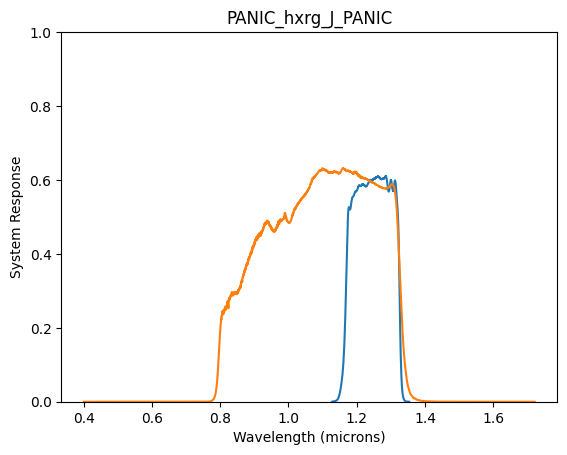

In [63]:
system_response1.plot(
    xlabel="Wavelength (microns)", ylabel="System Response", title=name1, ylim=(0, 1)
)
system_response2.plot(
    xlabel="Wavelength (microns)", ylabel="System Response", title=name1, ylim=(0, 1)
)

In [64]:
# sky properties
props_sky1 = {
    "pwv": 2.5,  # PWV [mm]
    "airmass": 1.1,  # airmass
    "seeing": 0.8,  # seeing (==FWHM) ["]
}

props_sky2 = {
    "pwv": 2.5,  # PWV [mm]
    "airmass": 1.1,  # airmass
    "seeing": 2,  # seeing (==FWHM) ["]
}

# instrument properties
props_instrument1 = {
    "name": name1,  # name to get SR/precision grid from file
    "plate_scale": 0.37,  # pixel plate scale ["]
    "N_dc": 0.049,  # dark current [e/pix/s]
    "N_rn": 15.9,  # read noise [e_rms/pix]
    "well_depth": 107201,  # well depth [e/pix]
    "well_fill": 0.7,  # fractional value to fill central target pixel, assuming gaussian (width function of seeing^)
    "read_time": 0.1,  # read time between images [s]
    "r0": 1.1,  # radius of telescope's primary mirror [m]
    "r1": 0.5,  # radius of telescope's secondary mirror [m]
    # "min_exp" : 0,          # optional, minimum exposure time [s]
    # "max_exp" : 120,        # optional, maximum exposure time [s]
    # "ap_rad" : 3            # optional, aperture radius [FWHM, seeing] for photometry -- 3 default == 7 sigma of Gaussian
}

# instrument properties
props_instrument2 = {
    "name": name2,  # name to get SR/precision grid from file
    "plate_scale": 0.31,  # pixel plate scale ["]
    "N_dc": 110,  # dark current [e/pix/s]
    "N_rn": 90,  # read noise [e_rms/pix]
    "well_depth": 56000,  # well depth [e/pix]
    "well_fill": 0.7,  # fractional value to fill central target pixel, assuming gaussian (width function of seeing^)
    "read_time": 0.1,  # read time between images [s]
    "r0": 0.5,  # radius of telescope's primary mirror [m]
    "r1": 0.14,  # radius of telescope's secondary mirror [m]
    # "min_exp" : 0,          # optional, minimum exposure time [s]
    # "max_exp" : 120,        # optional, maximum exposure time [s]
    # "ap_rad" : 3            # optional, aperture radius [FWHM, seeing] for photometry -- 3 default == 7 sigma of Gaussian
}

# target properties
Teff = 2680  # [K]
distance = 16.75  # [pc]

In [65]:
# get the precision and components used to calculate it (generates grid if not already present)
result1 = mphot.get_precision(
    props_instrument1, props_sky1, Teff, distance, extended=True, binning=1
)
result2 = mphot.get_precision(props_instrument2, props_sky2, Teff, distance, binning=1)

mphot.display_results(result1, result2)

single frame [ppt]                                    \
              PANIC_hxrg_J_PANIC speculoos_PIRT_1280SciCam_-60_zYJ   
All                         2.13                              2.70   
Star                        1.52                             0.787   
Scintillation               1.19                             0.763   
Sky                        0.781                             0.964   
Dark current              0.0122                              1.23   
Read noise                 0.422                              1.91   

              1 minute binned [ppt]                                    
                 PANIC_hxrg_J_PANIC speculoos_PIRT_1280SciCam_-60_zYJ  
All                           0.578                              1.92  
Star                          0.413                             0.560  
Scintillation                 0.324                             0.542  
Sky                           0.212                             0.685  
Dark current                3.33e-3                             0.872  
Read noise                    0.115                              1.36

,PANIC_hxrg_J_PANIC,speculoos_PIRT_1280SciCam_-60_zYJ
Teff [K],2.68e+3,2.68e+3
distance [pc],16.8,16.8
N_star [e/s],9.97e+4,5.34e+4
star_flux [e/m2/s],3.83e+4,8.54e+4
scn [e_rms],515,1.23e+3
pixels in aperture [pix],132,1.18e+3
ap_radius [pix],6.49,19.4
N_sky [e/pix/s],199,68.0
sky_radiance [e/m2/arcsec2/s],482,978
seeing [arcsec],0.800,2.00


,PANIC_hxrg_J_PANIC,speculoos_PIRT_1280SciCam_-60_zYJ
star [mag],11.8,12.4
sky [mag/arcsec2],16.4,17.1
vega_flux [e/s],5.06e+9,4.98e+9


In [49]:
z_name = "PANIC_hxrg_z_PANIC"
Y_name = "PANIC_hxrg_Y_PANIC"
J_name = "PANIC_hxrg_J_PANIC"
H_name = "PANIC_hxrg_H_PANIC"
Ks_name = "PANIC_hxrg_Ks_PANIC"

In [50]:
result1[1]["All"] * 1000

np.float64(0.1835586657932945)

In [57]:
# get the precision and components used to calculate it (generates grid if not already present)
print("instrument\t\t1 min precision [ppt]\texptime [s]")
for name in [z_name, Y_name, J_name, H_name, Ks_name]:
    props_instrument1["name"] = name
    # get the precision and components used to calculate it (generates grid if not already present)
    result1 = mphot.get_precision(
        props_instrument1, props_sky1, Teff, distance, extended=True, binning=1
    )
    print(f"{name}\t{result1[1]['All'] * 1000:.3f}\t{result1[2]['t [s]']:.2f}")

print(f"{name2}\t{result2[1]['All'] * 1000:.3f}\t{result2[2]['t [s]']:.2f}")

instrument		1 min precision [ppt]	exptime [s]
PANIC_hxrg_z_PANIC	0.981	18.44
PANIC_hxrg_Y_PANIC	0.756	9.34
PANIC_hxrg_J_PANIC	0.578	4.34
PANIC_hxrg_H_PANIC	0.569	2.37
PANIC_hxrg_Ks_PANIC	0.580	3.84
speculoos_PIRT_1280SciCam_-60_zYJ	1.921	30.21


In [ ]:
instrument		1 min precision [ppt]	exptime [s]
PANIC_hxrg_z	0.981	                18.44
PANIC_hxrg_Y	0.756	                9.34
PANIC_hxrg_J	0.578	                4.34
PANIC_hxrg_H	0.569	                2.37
PANIC_hxrg_Ks	0.580	                3.84
SPIRIT_zYJ	    1.921	                30.21

In [ ]:
# extended
instrument		10 min precision [ppt]	exptime [s]
PANIC_hxrg_z	0.310	                18.44
PANIC_hxrg_Y	0.239	                9.34
PANIC_hxrg_J	0.183	                4.34
PANIC_hxrg_H	0.180	                2.37
PANIC_hxrg_Ks	0.184	                3.84
SPIRIT_zYJ	    0.607	                30.21 # normal

In [ ]:
# normal
instrument		10 min precision [ppt]	exptime [s]
PANIC_hxrg_z	0.322	                19.81
PANIC_hxrg_Y	0.243	                9.67
PANIC_hxrg_J	0.187	                4.56
PANIC_hxrg_H	0.184	                2.51
PANIC_hxrg_Ks	1.103	                189.81
SPIRIT_zYJ	    0.607                   30.21

SyntaxError: invalid syntax (4057773915.py, line 1)

In [69]:
components

{'name': 'speculoos_PIRT_1280SciCam_-60_zYJ',
 'Teff [K]': 2680,
 'distance [pc]': 16.75,
 'N_star [e/s]': np.float64(53378.35102676149),
 'star_flux [e/m2/s]': np.float64(85398.57405910385),
 'scn [e_rms]': np.float64(1230.8648769819424),
 'pixels in aperture [pix]': 1176.8713374529923,
 'ap_radius [pix]': 19.35483870967742,
 'N_sky [e/pix/s]': np.float64(68.00087681311497),
 'sky_radiance [e/m2/arcsec2/s]': np.float64(977.5945629001816),
 'seeing [arcsec]': 2,
 'pwv [mm]': 2.5,
 'airmass': 1.1,
 'plate_scale ["/pix]': 0.31,
 'N_dc [e/pix/s]': 110,
 'N_rn [e_rms/pix]': 90,
 'A [m2]': 0.7238229473870883,
 'r0 [m]': 0.5,
 'r1 [m]': 0.14,
 't [s]': np.float64(30.212233558838985),
 'well_depth [e/pix]': 56000,
 'peak well_fill': 0.7,
 'binning [mins]': 1,
 'read_time [s]': 0.1,
 'binned images': np.float64(1.979398841841667)}

In [81]:
import numpy as np

names = [z_name, Y_name, J_name, H_name, Ks_name]
props_instrument1["name"] = names[4]

result1 = mphot.get_precision(
    props_instrument1, props_sky1, Teff, distance, extended=True, binning=1
)


image_precision, binned_precision, components = result1

exp_time = components["t [s]"]
base_N_star = components["N_star [e/s]"]

flux_factor = np.logspace(-2, 2, 100)
N_stars = [base_N_star * i for i in flux_factor]

precision_array = []
flux_array = []

for i in N_stars:
    image_precision_i, binned_precision_i, components_i = mphot.get_precision(
        props_instrument1, props_sky1, Teff, distance, exp_time=exp_time, N_star=i
    )

    precision_array.append(binned_precision_i)
    flux_array.append(components_i["N_star [e/s]"])

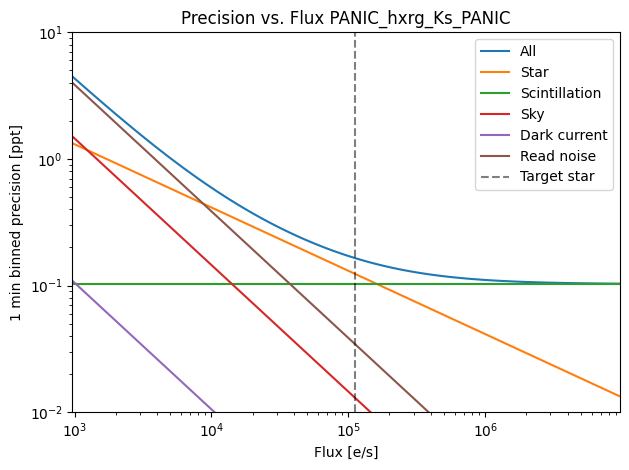

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots()

precision_df = pd.DataFrame(precision_array, index=flux_array) * 1000
precision_df.plot(logy=True, logx=True, ax=ax, legend=True)

ax.axvline(
    components["N_star [e/s]"],
    linestyle="--",
    color="k",
    alpha=0.5,
    label="Target star",
)

ax.set_xlim(min(flux_array), max(flux_array))
ax.set_ylim(0.01, 10)
ax.minorticks_on()


ax.set_xlabel("Flux [e/s]")
ax.set_ylabel(f"{components['binning [mins]']} min binned precision [ppt]")
ax.set_title(f"Precision vs. Flux {components['name']}")

ax.legend()

plt.tight_layout()